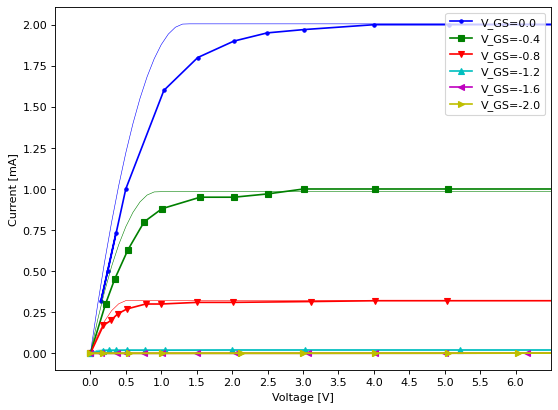

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(8, 6), dpi=80)

with open("data_csv.csv") as f:
    rawdata = f.readlines()
rawdata = rawdata[3:]

v_gs = []
v_ds = []
i_ds = []

c = ["b","g","r","c","m","y"]

for i in range (0, len(rawdata)):
    v_gs.append(float(rawdata[i].split(",")[0]))
    v_ds.append(float(rawdata[i].split(",")[1]))
    i_ds.append(float(rawdata[i].split(",")[2]))

plt.plot(v_ds[:15],i_ds[:15],marker=".",c="b")
plt.plot(v_ds[15:31],i_ds[15:31],marker="s",c="g")
plt.plot(v_ds[31:47],i_ds[31:47],marker="v",c="r")
plt.plot(v_ds[47:62],i_ds[47:62],marker="^",c="c")
plt.plot(v_ds[62:88],i_ds[62:88],marker="<",c="m")
plt.plot(v_ds[88:],i_ds[88:],marker=">",c="y")

th_i_d = []
for k in range (0, 4):
    th_v_gs = -0.4 * k
    beta = 2.25
    vt = -1.335
    th_v_ds = [i/10 for i in range (0, 200)]
    new_data = []
    for i in range (0, 200):
        if(th_v_ds[i] < th_v_gs - vt):
            new_data.append(beta*((th_v_gs - vt)*th_v_ds[i] - 1/2*((th_v_ds[i])*(th_v_ds[i]))))
        else :
            new_data.append(1/2*beta*(th_v_gs-vt)**2)
    th_i_d.append(new_data)
#    if(k == 4):
    plt.plot(th_v_ds,th_i_d[k],c=c[k],linewidth = 0.5)


#for i in range (0, len(rawdata)):
#    print(i, v_gs[i])

#0.0 ~14
#0.4 15~30
#0.8 31~45
#1.2 46~59
#1.6 60~84
#2.0 85~

c = ["b","g","r","c","m","y"]

plt.plot(v_ds[88:],i_ds[88:],marker=">",c="y")
#plt.ylim(0,0.025)
plt.xlim(-0.5, 6.5)
plt.xticks(np.arange(0, 6.5, 0.5))

plt.legend(["V_GS=0.0", "V_GS=-0.4", "V_GS=-0.8", "V_GS=-1.2", "V_GS=-1.6", "V_GS=-2.0"], loc ="upper right")
plt.ylabel("Current [mA]")
plt.xlabel("Voltage [V]")

plt.savefig("figures/all.png")

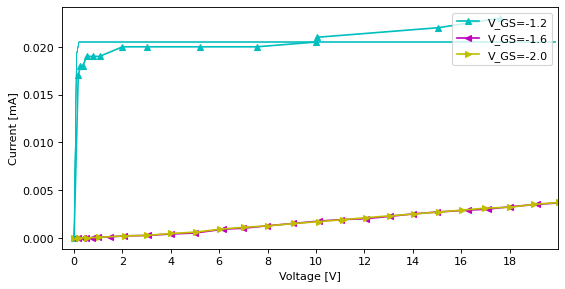

In [2]:
plt.figure(figsize=(8, 4), dpi=80)

plt.plot(v_ds[47:62],i_ds[47:62],marker="^",c="c")
plt.plot(v_ds[62:88],i_ds[62:88],marker="<",c="m")
plt.plot(v_ds[88:],i_ds[88:],marker=">",c="y")

for i in range (0, 5):
    plt.plot(th_v_ds,th_i_d[k],c=c[k],linewidth = 0.5)

plt.legend(["V_GS=-1.2","V_GS=-1.6", "V_GS=-2.0"], loc ="upper right")

plt.xlim(-0.5, 20)
plt.xticks(np.arange(0, 20, 2))
plt.ylabel("Current [mA]")
plt.xlabel("Voltage [V]")

plt.savefig("figures/lower.png")